In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
census_data=pd.read_csv('IncomeCensus.csv')

In [5]:
census_data['workclass'] = census_data['workclass'].str.strip()

In [6]:
census_data['occupation'] = census_data['occupation'].str.strip()

In [7]:
census_data['native-country']=census_data['native-country'].str.strip()

In [8]:
census_data['above-50k']=census_data['above-50k'].str.strip()

In [9]:
index_hoursgr70 = census_data[census_data['hours-per-week'] > 70].index
census_data.drop(index_hoursgr70,inplace=True)

In [10]:
index_questionmark = census_data[census_data['workclass']=='?'].index
census_data.drop(index_questionmark,inplace=True)

In [11]:
index_questionmark_occu = census_data[census_data['occupation']=='?'].index
census_data.drop(index_questionmark_occu,inplace=True)

In [13]:
x=census_data.iloc[:,:-1]  #Independent variable
x=pd.get_dummies(x)
y=census_data.iloc[:,-1]   #Target variable
f_score=chi2(x,y)   #returns f score and p value 
f_score

(array([1.17781397e+04, 1.20436410e+05, 3.26253750e+03, 1.13204436e+08,
        1.87530496e+06, 7.65955965e+03, 1.61020485e+02, 3.62067552e+01,
        1.64647575e+02, 8.29989799e+02, 2.44741865e+01, 4.10419129e+00,
        2.58377448e+00, 2.18414322e+02, 3.25058329e+02, 9.31366951e+01,
        5.38618951e+01, 9.40667620e+01, 1.42414271e+02, 1.28834691e+02,
        1.96690565e+00, 9.50728917e-01, 1.21157392e+03, 7.13912051e+02,
        5.79587198e+02, 1.29325807e+03, 2.06345568e+01, 1.05991903e+03,
        1.23079367e+02, 6.97925287e+02, 7.83995369e+00, 4.87744825e+03,
        7.11544887e+01, 3.12603342e+03, 2.40596798e+02, 1.66137606e+02,
        3.64970761e+02, 6.10728985e-01, 1.45134976e+01, 1.72527665e+03,
        1.30886605e+02, 3.64512082e+02, 2.49762953e+02, 1.10942828e+03,
        6.90749966e+01, 1.35978033e+03, 1.85552116e+01, 9.21798355e+00,
        1.28754669e+01, 2.71440881e+01, 4.38022446e+03, 1.28815116e+03,
        3.31116074e+02, 1.90733811e+03, 8.80238641e+02, 6.554053

In [17]:
p_value=pd.Series(f_score[1],index=x.columns)
p_value.sort_values(ascending=False,inplace=True)

In [18]:
p_value

native-country_Cuba                 0.77
native-country_Ireland              0.66
native-country_Hong                 0.63
native-country_Holand-Netherlands   0.57
occupation_Armed-Forces             0.43
                                    ... 
occupation_Exec-managerial          0.00
relationship_ Husband               0.00
fnlwgt                              0.00
relationship_ Own-child             0.00
age                                 0.00
Length: 105, dtype: float64

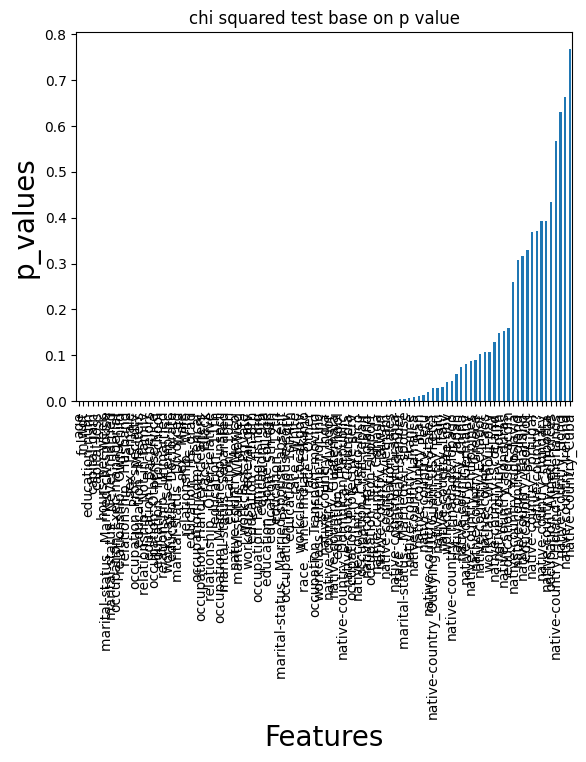

In [16]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [ ]:
#pipe = Pipeline([('selector', SelectKBest(chi2, k=5)),
 #                ('classifier', LogisticRegression())])

In [ ]:
#search_space = [{'selector__k': [4, 5, 6, 7, 8]},
 #               {'classifier': [LogisticRegression(solver='lbfgs')],
  #               'classifier__C': [0.01, 0.1, 1.0]},
   #             {'classifier': [RandomForestClassifier(n_estimators=100)],
    #             'classifier__max_depth': [5, 10, None]},
     #           {'classifier': [KNeighborsClassifier()],
      #           'classifier__n_neighbors': [3, 7, 11],
       #          'classifier__weights': ['uniform', 'distance']}]

In [ ]:
#clf = GridSearchCV(pipe, search_space, cv=5,scoring='f1',return_train_score=True,n_jobs = -1)

In [ ]:
#X = pd.get_dummies(X)

In [ ]:
#clf = clf.fit(X, y)

In [ ]:
#clf.n_features_in_

In [ ]:
#clf.cv_results_

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
#fs = SelectKBest(score_func=chi2, k='all')
#fs.fit(X_train, y_train)
#X_train_fs = fs.transform(X_train)
#X_test_fs = fs.transform(X_test)

In [ ]:
#X_train.columns

In [ ]:
#cols = list(X_train.columns.values)
#for i in range(len(fs.scores_)):
 #print('Feature %s: %f' % (cols[i], fs.scores_[i]))